In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import statistics
from scipy.optimize import curve_fit
import math 
from scipy.stats import binom
import seaborn as sns
from scipy import stats
import matplotlib.patches as mpatches
from scipy.stats import beta

In [3]:
#read in behavior data
df = pd.read_csv (r'/home/emonroe/Downloads/20210531_toEM/behavior_csv/senor_clean_contingencies_only_parsed_data.csv')

In [4]:
# define a unch of new columns to keep track of day number, session number, contingency number, stem switch, rewards by session / stem
df['day']= df['date'].ne(df['date'].shift()).cumsum()
#df['diff_cont'] = df.groupby(['day','session'],group_keys=True)['contingency']

for ix in range(len(df)):
    if df.loc[ix,'trial']<60:
        df.loc[ix,'cont_num']=1
    elif df.loc[ix,'trial']>119:
        df.loc[ix,'cont_num']=3
    else:
        df.loc[ix,'cont_num'] =2

#df['diff_cont'] = df.

#df['diff_cont'] = df['contingency'].ne(df['contingency'].shift())


#df['cont_num'] = df.groupby(['day','session'])['diff_cont'].cumsum()
# del df['diff_cont']
# df['new_cont'] = df['cont_num'].ne(df['cont_num'].shift())
df['day_chng'] = df['day'].ne(df['day'].shift())
df['stem_switch'] = df['stem'].ne(df['stem'].shift())
df['bout_num'] = df['stem'].ne(df['stem'].shift()).cumsum()

# df["stemChange"] = (df["stem"].shift(1, fill_value=df["stem"].head(1)) != df["stem"]).astype(int) #better way to calc?
for ix in range(len(df)):
    cont= str(df.loc[ix, 'contingency'])
    cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
    cont = [int(i) for i in cont]
    df.loc[ix, 'glob_nom_avg'] = statistics.mean(cont)
df['sess_chng'] = df['session'].ne(df['session'].shift()).cumsum()
df['sess_chng'] = df['session'].ne(df['session'].shift()).cumsum()
obj = ['day', 'session', 'stem']

df['rew_count'] = df.groupby(obj)[['reward']].cumsum()

df[0:60]

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,day_chng,stem_switch,bout_num,glob_nom_avg,sess_chng,rew_count
0,0,4,B,1,805020202050,20201028,1,0,1,1.0,True,True,1,40.0,1,1
1,1,1,A,0,805020202050,20201028,1,1,1,1.0,False,True,2,40.0,1,0
2,2,2,A,0,805020202050,20201028,1,2,1,1.0,False,False,2,40.0,1,0
3,3,3,B,1,805020202050,20201028,1,3,1,1.0,False,True,3,40.0,1,2
4,4,4,B,0,805020202050,20201028,1,4,1,1.0,False,False,3,40.0,1,2
5,5,5,C,0,805020202050,20201028,1,5,1,1.0,False,True,4,40.0,1,0
6,6,6,C,1,805020202050,20201028,1,6,1,1.0,False,False,4,40.0,1,1
7,7,1,A,1,805020202050,20201028,1,7,1,1.0,False,True,5,40.0,1,1
8,8,2,A,1,805020202050,20201028,1,8,1,1.0,False,False,5,40.0,1,2
9,9,3,B,0,805020202050,20201028,1,9,1,1.0,False,True,6,40.0,1,2


In [5]:
#new columns, 0 or 1 for if hes at each stem 

df.loc[df.stem == "A", "ChooseA"] = 1
df.loc[df.stem == "B", "ChooseB"] = 1
df.loc[df.stem == "C", "ChooseC"] = 1
df['ChooseA'] = df['ChooseA'].fillna(0)
df['ChooseB'] = df['ChooseB'].fillna(0)
df['ChooseC'] = df['ChooseC'].fillna(0)
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,day_chng,stem_switch,bout_num,glob_nom_avg,sess_chng,rew_count,ChooseA,ChooseB,ChooseC
0,0,4,B,1,805020202050,20201028,1,0,1,1.0,True,True,1,40.0,1,1,0.0,1.0,0.0
1,1,1,A,0,805020202050,20201028,1,1,1,1.0,False,True,2,40.0,1,0,1.0,0.0,0.0
2,2,2,A,0,805020202050,20201028,1,2,1,1.0,False,False,2,40.0,1,0,1.0,0.0,0.0
3,3,3,B,1,805020202050,20201028,1,3,1,1.0,False,True,3,40.0,1,2,0.0,1.0,0.0
4,4,4,B,0,805020202050,20201028,1,4,1,1.0,False,False,3,40.0,1,2,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3.0,False,False,814,45.0,74,28,1.0,0.0,0.0
13289,13289,1,A,0,508020208020,20201107,6,176,11,3.0,False,False,814,45.0,74,28,1.0,0.0,0.0
13290,13290,2,A,0,508020208020,20201107,6,177,11,3.0,False,False,814,45.0,74,28,1.0,0.0,0.0
13291,13291,1,A,1,508020208020,20201107,6,178,11,3.0,False,False,814,45.0,74,29,1.0,0.0,0.0


In [6]:
# df['rew_count'] = df.groupby(obj)[['reward']].cumsum()

In [8]:
#look at only 1 session, started to prep looking at beta distribution but I didn't like it so this section is irrelevant 

#random session is 1st contignecy of some session (up to 74)

random_session = df[df['sess_chng']==50]
random_session = random_session[random_session['cont_num']==1]
random_session

#take only the visits to 1 stem (session 50 is nice because only B visits are in first bout)
# first_bout = random_session[random_session.ChooseB==1]


# beta_prep_df = first_bout[['stem','reward','rew_count']]
# bout_data_alpha= beta_prep_df


# for sesh_bout in range(1, df['sess_chng'].max()):
#     sesh_data = first_bout.loc[only_first_cont['sess_chng'] == sesh_bout] 
#     stem_switch_ix = sesh_data[sesh_data['stem_switch'] == 1].index

In [9]:
random_session.stem_switch

8793     True
8794    False
8795    False
8796     True
8797    False
8798    False
8799    False
8800    False
8801    False
8802    False
8803    False
8804    False
8805    False
8806    False
8807    False
8808    False
8809    False
8810    False
8811    False
8812    False
8813    False
8814    False
8815    False
8816    False
8817     True
8818    False
8819    False
8820    False
8821    False
8822    False
8823    False
8824    False
8825    False
8826    False
8827    False
8828    False
8829    False
8830    False
8831    False
8832    False
8833    False
8834    False
8835    False
8836    False
8837    False
8838    False
8839    False
8840    False
8841    False
8842    False
8843    False
8844    False
8845    False
8846    False
8847    False
8848    False
8849    False
8850    False
8851    False
8852    False
Name: stem_switch, dtype: bool

In [10]:
#in the end, id like to be able to loop through sessions
#take the first 3 bouts (maybe only use the sessions where he explores each of the three?)
#make distribution for each of those bouts 
#annotate which is the 4th visited stem. 

In [11]:
# bout = df with only the first of each stem bout 

bout = random_session[random_session.stem_switch==1]
# bout_num = random_session
# first_stem=bout['stem'].iloc[0]
# second_stem=bout['stem'].iloc[1]
# third_stem = bout['stem'].iloc[2]
# if len(bout) > 4
#     fourth_stem = bout['stem'].iloc[3]
#     len_fourth_bout = len(fourth_bout)


In [12]:
bout

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,day_chng,stem_switch,bout_num,glob_nom_avg,sess_chng,rew_count,ChooseA,ChooseB,ChooseC
8793,8793,4,B,1,508020505050,20201104,5,0,8,1.0,False,True,599,50.0,50,1,0.0,1.0,0.0
8796,8796,2,A,1,508020505050,20201104,5,3,8,1.0,False,True,600,50.0,50,1,1.0,0.0,0.0
8817,8817,5,C,1,508020505050,20201104,5,24,8,1.0,False,True,601,50.0,50,1,0.0,0.0,1.0


In [13]:
random_session

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,day_chng,stem_switch,bout_num,glob_nom_avg,sess_chng,rew_count,ChooseA,ChooseB,ChooseC
8793,8793,4,B,1,508020505050,20201104,5,0,8,1.0,False,True,599,50.0,50,1,0.0,1.0,0.0
8794,8794,3,B,0,508020505050,20201104,5,1,8,1.0,False,False,599,50.0,50,1,0.0,1.0,0.0
8795,8795,4,B,1,508020505050,20201104,5,2,8,1.0,False,False,599,50.0,50,2,0.0,1.0,0.0
8796,8796,2,A,1,508020505050,20201104,5,3,8,1.0,False,True,600,50.0,50,1,1.0,0.0,0.0
8797,8797,1,A,1,508020505050,20201104,5,4,8,1.0,False,False,600,50.0,50,2,1.0,0.0,0.0
8798,8798,2,A,1,508020505050,20201104,5,5,8,1.0,False,False,600,50.0,50,3,1.0,0.0,0.0
8799,8799,1,A,1,508020505050,20201104,5,6,8,1.0,False,False,600,50.0,50,4,1.0,0.0,0.0
8800,8800,2,A,1,508020505050,20201104,5,7,8,1.0,False,False,600,50.0,50,5,1.0,0.0,0.0
8801,8801,1,A,1,508020505050,20201104,5,8,8,1.0,False,False,600,50.0,50,6,1.0,0.0,0.0
8802,8802,2,A,1,508020505050,20201104,5,9,8,1.0,False,False,600,50.0,50,7,1.0,0.0,0.0


In [14]:
first_bout_num = random_session.bout_num.min()
first_bout = random_session.loc[random_session.bout_num==first_bout_num]
second_bout_num = random_session.bout_num.min()+1
second_bout = random_session.loc[random_session.bout_num==second_bout_num]
third_bout_num = random_session.bout_num.min()+2
third_bout = random_session.loc[random_session.bout_num==third_bout_num]

In [15]:
first_bout_beta_data_s = first_bout['reward'].sum()
first_bout_beta_data_f = len(first_bout)-first_bout_beta_data_s
second_bout_beta_data_s = second_bout['reward'].sum()
second_bout_beta_data_f = len(second_bout)-second_bout_beta_data_s
third_bout_beta_data_s = third_bout['reward'].sum()
third_bout_beta_data_f = len(third_bout)-third_bout_beta_data_s

In [16]:
third_bout_beta_data_s

20

Text(0.5, 1.0, 'beta dist for first three stems visited')

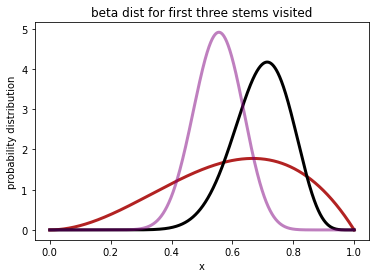

In [17]:
#gives the dist for first 3 stems visited 
x = np.linspace(0, 1, 10000)
y1 = beta(first_bout_beta_data_s+1, first_bout_beta_data_f+1)
y2 = beta(second_bout_beta_data_s+1, second_bout_beta_data_f+1)
y3 = beta(third_bout_beta_data_s+1, third_bout_beta_data_f+1)
#     ax.set_title(f"PDF of Beta; #success={a-1},#failures={b-1} (red)", fontsize=20)
#     ax.set_xlabel("X", fontsize=16)
#     ax.set_ylabel("Probability Density", fontsize=16)
plt.plot(x, y1.pdf(x), linewidth=3, color='firebrick')
plt.plot(x, y2.pdf(x), linewidth=3, color='black')
plt.plot(x, y3.pdf(x), linewidth=3, color='purple',alpha=.5)

plt.xlabel('x')
plt.ylabel('probability distribution')
plt.title('beta dist for first three stems visited')
#want to include: order of stem visits, len of them, 4th stem visited, 
#or the last of three if there isn't fourth 


In [ ]:
#for every single session, what are the first three stems visited, and where does he go for the fourth? 
#could quantify this pretty easily, but don't think itll be the most fruitful right away 


for ix in range(1,(df['sess_chng']).max()):
    random_session = df[df['sess_chng']==ix]
    random_session = random_session[random_session['cont_num']==1]
    bout = random_session[random_session.stem_switch==1]
    cont_nom=random_session.contingency.iloc[0]
    first_stem=bout['stem'].iloc[0]
    if len(bout)>1:
        second_stem=bout['stem'].iloc[1]
    else: 
        second_stem = first_stem
    if len(bout)>2:
        third_stem = bout['stem'].iloc[2]
    else: 
        third_stem = second_stem
    if len(bout) > 3:
        fourth_stem = bout['stem'].iloc[3]
        fourth_bout_num = random_session.bout_num.min()+3
        fourth_bout_len = len(random_session.loc[random_session.bout_num==fourth_bout_num])
    else:
        fourth_stem=third_stem
    first_bout_num = random_session.bout_num.min()
    first_bout = random_session.loc[random_session.bout_num==first_bout_num]
    second_bout_num = random_session.bout_num.min()+1
    second_bout = random_session.loc[random_session.bout_num==second_bout_num]
    third_bout_num = random_session.bout_num.min()+2
    third_bout = random_session.loc[random_session.bout_num==third_bout_num]
    first_bout_beta_data_s = first_bout['reward'].sum()
    first_bout_beta_data_f = len(first_bout)-first_bout_beta_data_s
    second_bout_beta_data_s = second_bout['reward'].sum()
    second_bout_beta_data_f = len(second_bout)-second_bout_beta_data_s
    third_bout_beta_data_s = third_bout['reward'].sum()
    third_bout_beta_data_f = len(third_bout)-third_bout_beta_data_s
    x = np.linspace(0, 1, 10000)
    y1 = beta(first_bout_beta_data_s+1, first_bout_beta_data_f+1)
    y2 = beta(second_bout_beta_data_s+1, second_bout_beta_data_f+1)
    y3 = beta(third_bout_beta_data_s+1, third_bout_beta_data_f+1)
    #     ax.set_title(f"PDF of Beta; #success={a-1},#failures={b-1} (red)", fontsize=20)
    #     ax.set_xlabel("X", fontsize=16)
    #     ax.set_ylabel("Probability Density", fontsize=16)
    plt.figure()
    plt.plot(x, y1.pdf(x), linewidth=3, color='firebrick')
    plt.plot(x, y2.pdf(x), linewidth=3, color='black')
    plt.plot(x, y3.pdf(x), linewidth=3, color='purple',alpha=.5)
    plt.xlabel('x')
    plt.ylabel('probability distribution')
    plt.title(f'beta dist for first three stems visited--{cont_nom}')
    plt.legend([first_stem,second_stem,third_stem,fourth_stem])
    plt.annotate(f'stem4={fourth_stem}-{fourth_bout_len}',xy=(.7,2))
    #plt.annotate(f'stem1={first_stem}-red-{len(first_bout)}\nstem2={second_stem}-black-{len(second_bout)}\nstem3={third_stem}-purple-{len(third_bout)}\nstem4={fourth_stem}-{fourth_bout_len}',xy=(0,2))

In [19]:
#okay that did not show what I had expected! 
#next thing to try is what do the distributions look at the end of session, did he spend most time at the best? 
#also want to look at what distributions look like before first exploit? 
#one pattern is that he stops exploring one stem early (still curved)- how does he know? 

In [ ]:
#at the end of the first contingency, what are the dsitributions for all three stems, and how much time did he spend at each? 
#this would be a good place to start quantifying

for ix in range(1,(df['sess_chng']).max()):
    random_session = df[df['sess_chng']==ix]
    random_session = random_session[random_session['cont_num']==1]
    cont_nom=random_session.contingency.iloc[0]
    day_nom=random_session.day.iloc[0]
    sesh_nom=random_session.contingency.iloc[0]

    chose_a = random_session[random_session['stem']=='A']
    chose_b = random_session[random_session['stem']=='B']
    chose_c = random_session[random_session['stem']=='C']
    if len(chose_a) > len(chose_b) & len(chose_a) > len(chose_c):
        longest = 'A'
    if len(chose_b) > len(chose_c) & len(chose_b) > len(chose_a):
        longest = 'B'  
    if len(chose_c) > len(chose_b) & len(chose_c) > len(chose_a):
        longest = 'C' 
    s_a= chose_a['reward'].sum()
    f_a = len(chose_a)-s_a
    s_b= chose_b['reward'].sum()
    f_b = len(chose_b)-s_b
    s_c= chose_c['reward'].sum()
    f_c = len(chose_c)-s_c
    y1 = beta(s_a+1, f_a+1)
    y2 = beta(s_b+1, f_b+1)
    y3 = beta(s_c+1, f_c+1)
    
#     x = np.linspace(0, 1, 10000)
#     y1 = beta(first_bout_beta_data_s+1, first_bout_beta_data_f+1)
#     y2 = beta(second_bout_beta_data_s+1, second_bout_beta_data_f+1)
#     y3 = beta(third_bout_beta_data_s+1, third_bout_beta_data_f+1)
#     #     ax.set_title(f"PDF of Beta; #success={a-1},#failures={b-1} (red)", fontsize=20)
#     #     ax.set_xlabel("X", fontsize=16)
#     #     ax.set_ylabel("Probability Density", fontsize=16)
    plt.figure()
    plt.plot(x, y1.pdf(x), linewidth=3, color='firebrick')
    plt.plot(x, y2.pdf(x), linewidth=3, color='black')
    plt.plot(x, y3.pdf(x), linewidth=3, color='purple')
    plt.xlabel('x')
    plt.ylabel('probability distribution')
    plt.title(f'beta dist for three stems- {cont_nom}')
    plt.legend(['A', "B",'C'])
    plt.annotate(f'{random_session.ChooseA.sum()}  {random_session.ChooseB.sum()}  {random_session.ChooseC.sum()}',xy=(1,2))
    
    
#Trends- I see that at first, he really develops all three distributions. later on, often times one does not get sampled much- not wasting time at the worst.
#kurtosis!

In [21]:
lst_means_a=[]
lst_means_b=[]
lst_means_c=[]
lst_var_a=[]
lst_var_b=[]
lst_var_c=[]
lst_skew_a=[]
lst_skew_b=[]
lst_skew_c=[]
lst_kurt_a=[]
lst_kurt_b=[]
lst_kurt_c=[]
trials_a=[]
trials_b=[]
trials_c=[]

for ix in range(1,(df['sess_chng']).max()):
    random_session = df[df['sess_chng']==ix]
    random_session = random_session[random_session['cont_num']==1]
    cont_nom=random_session.contingency.iloc[0]
    day_nom=random_session.day.iloc[0]
    sesh_nom=random_session.contingency.iloc[0]

    chose_a = random_session[random_session['stem']=='A']
    chose_b = random_session[random_session['stem']=='B']
    chose_c = random_session[random_session['stem']=='C']
    if len(chose_a) > len(chose_b) & len(chose_a) > len(chose_c):
        longest = 'A'
    if len(chose_b) > len(chose_c) & len(chose_b) > len(chose_a):
        longest = 'B'  
    if len(chose_c) > len(chose_b) & len(chose_c) > len(chose_a):
        longest = 'C' 
    s_a= chose_a['reward'].sum()
    f_a = len(chose_a)-s_a
    s_b= chose_b['reward'].sum()
    f_b = len(chose_b)-s_b
    s_c= chose_c['reward'].sum()
    f_c = len(chose_c)-s_c
#     trials_a= random_session.ChooseA.sum()
#     trials_b= random_session.ChooseB.sum()

#     trials_c= random_session.ChooseC.sum()


#     y1 = beta(s_a+1, f_a+1)
    
#     y2 = beta(s_b+1, f_b+1)
#     y3 = beta(s_c+1, f_c+1)
    
    mean_a, var_a, skew_a, kurt_a = beta.stats(s_a+1, f_a+1, moments='mvsk')
    mean_b, var_b, skew_b, kurt_b = beta.stats(s_b+1, f_b+1, moments='mvsk')
    mean_c, var_c, skew_c, kurt_c = beta.stats(s_c+1, f_c+1, moments='mvsk')

    lst_means_a.append(mean_a)
    lst_means_b.append(mean_b)
    lst_means_c.append(mean_c)
    lst_var_a.append(var_a)
    lst_var_b.append(var_b)
    lst_var_c.append(var_c)
    lst_skew_a.append(skew_a)
    lst_skew_b.append(skew_b)
    lst_skew_c.append(skew_c)
    lst_kurt_a.append(kurt_a)
    lst_kurt_b.append(kurt_b)
    lst_kurt_c.append(kurt_c)
    trials_a.append(len(chose_a))
    trials_b.append(len(chose_b))
    trials_c.append(len(chose_c))







   # lst_var.append([var_a,var_b,var_c])
#     lst_skew.append([skew_a,skew_b,skew_c])
#     lst_kurt.append([kurt_a,kurt_b,kurt_c])
    
    #[[meana,b,c session1 ],[meana,b,c session2]]
#     x = np.linspace(0, 1, 10000)
#     y1 = beta(first_bout_beta_data_s+1, first_bout_beta_data_f+1)
#     y2 = beta(second_bout_beta_data_s+1, second_bout_beta_data_f+1)
#     y3 = beta(third_bout_beta_data_s+1, third_bout_beta_data_f+1)
#     #     ax.set_title(f"PDF of Beta; #success={a-1},#failures={b-1} (red)", fontsize=20)
#     #     ax.set_xlabel("X", fontsize=16)
#     #     ax.set_ylabel("Probability Density", fontsize=16)
#     plt.figure()
#     plt.plot(x, y1.pdf(x), linewidth=3, color='firebrick')
#     plt.plot(x, y2.pdf(x), linewidth=3, color='black')
#     plt.plot(x, y3.pdf(x), linewidth=3, color='purple')
#     plt.xlabel('x')
#     plt.ylabel('probability distribution')
#     plt.title(f'beta dist for three stems- {cont_nom}')
#     plt.legend(['A', "B",'C'])
#     plt.annotate(f'{random_session.ChooseA.sum()}  {random_session.ChooseB

In [22]:
new_lst= [lst_means_a,lst_means_b,lst_means_c,lst_var_a,lst_var_b,lst_var_c,lst_skew_a,lst_skew_b,lst_skew_c,lst_kurt_a,lst_kurt_b,lst_kurt_c,trials_a,trials_b,trials_c]
#new_lst

In [23]:
df_beta = pd.DataFrame(new_lst)
df_beta = pd.DataFrame.transpose(df_beta)
df_beta.columns =['A_mean', 'B_mean', 'C_mean','A_var', 'B_var', 'C_var','A_skew', 'B_skew', 'C_skew','A_kurt', 'B_kurt', 'C_kurt','trials_a','trials_b','trials_c']

df_beta

,A_mean,B_mean,C_mean,A_var,B_var,C_var,A_skew,B_skew,C_skew,A_kurt,B_kurt,C_kurt,trials_a,trials_b,trials_c
0,0.5806451612903226,0.2222222222222222,0.35294117647058826,0.007609261186264308,0.009096816114359974,0.012687427912341407,-0.1120606457020665,0.5824823725107175,0.27485945677215445,-0.15818821701174643,0.1989795918367347,-0.1923444976076555,29,16,15
1,0.22727272727272727,0.4444444444444444,0.6538461538461539,0.007635644987423643,0.01299545159194282,0.008382642998027615,0.5201809639866857,0.09746794344808964,-0.24004801440480167,0.1496470588235294,-0.27214285714285713,-0.12344248044045204,20,16,24
2,0.14285714285714285,0.5333333333333333,0.5,0.00816326530612245,0.008028673835125448,0.010869565217391304,0.9882117688026186,-0.04650148807142781,0.0,1.025735294117647,-0.1786728896103896,-0.24,12,28,20
3,0.5862068965517241,0.125,0.6206896551724138,0.008085612366230677,0.012152777777777778,0.007847800237812128,-0.1237040304592533,1.360672102833218,-0.17579008416550518,-0.1652632827324478,1.9792207792207792,-0.14259530791788858,27,6,27
4,0.22727272727272727,0.4583333333333333,0.6,0.007635644987423643,0.009930555555555555,0.011428571428571429,0.5201809639866857,0.0643263084620839,-0.17007533576245187,0.1496470588235294,-0.2162452931683701,-0.21936758893280633,20,22,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.6956521739130435,0.1111111111111111,0.45454545454545453,0.0045046856775127694,0.009876543209876543,0.02066115702479339,-0.24292442607879983,1.422952349318048,0.09730085108210398,-0.03573706268221574,2.284090909090909,-0.4153846153846154,44,7,9
69,0.42857142857142855,0.56,0.2222222222222222,0.030612244897959183,0.004831372549019608,0.01728395061728395,0.18144368465060579,-0.06640069642688669,0.768322049753197,-0.5555555555555556,-0.10671875294516804,0.3116883116883117,5,48,7
70,0.5714285714285714,0.5961538461538461,0.2857142857142857,0.030612244897959183,0.004542536563581556,0.025510204081632654,-0.18144368465060579,-0.10567777878081941,0.5962847939999439,-0.5555555555555556,-0.09264379586960232,-0.12,5,50,5
71,0.16666666666666666,0.5555555555555556,0.6888888888888889,0.010683760683760684,0.024691358024691357,0.004659151905528717,0.9214008855198343,-0.128564869306645,-0.23551312233753194,0.7885714285714286,-0.4772727272727273,-0.043533679772526715,10,7,43


In [24]:
#now I want to look at how often he spends the most time at the stem with the highest mean

Text(0.5, 0, 'session')

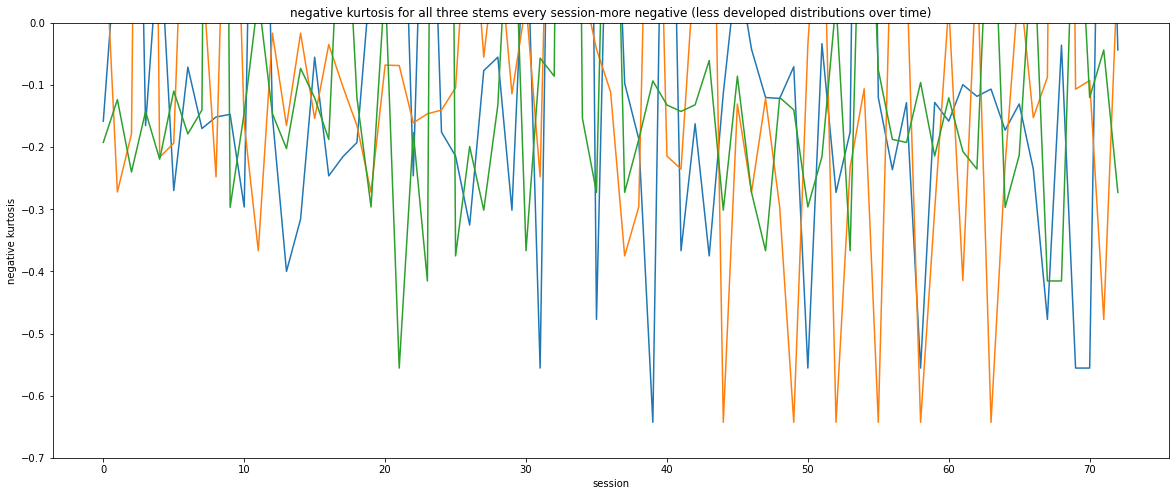

In [25]:
#ooh but first I can look at the kurtosis of the nominally worst stem? 
plt.figure(figsize = (20,8))
plt.plot(df_beta.A_kurt)
plt.plot(df_beta.B_kurt)
plt.plot(df_beta.C_kurt)
plt.ylim(-.7,0)
plt.title('negative kurtosis for all three stems every session-more negative (less developed distributions over time)')
plt.ylabel('negative kurtosis')
plt.xlabel('session')

In [26]:
smallest_kurt=[]
for ix in range(len(df_beta)):
    smallest_kurt.append(min(df_beta.iloc[ix]['A_kurt'],df_beta.iloc[ix]['B_kurt'],df_beta.iloc[ix]['C_kurt']))#==[df_beta.iloc[ix]['C_kurt']]
#session_min = (df_beta.A_kurt,df_beta.B_kurt,df_beta.C_kurt).min()

Text(0, 0.5, 'min kurtosis')

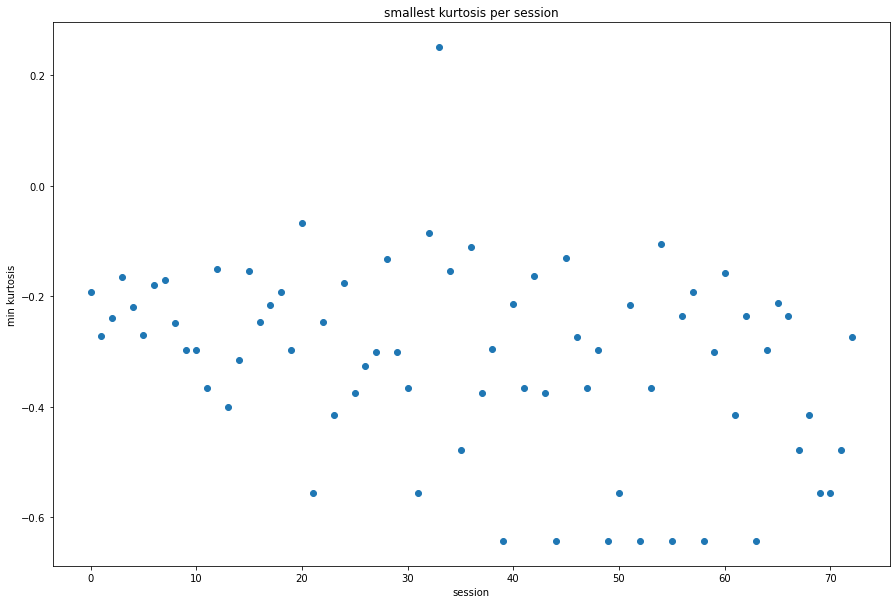

In [27]:
plt.figure(figsize = (15,10))
plt.scatter(range(len(smallest_kurt)),smallest_kurt)
plt.title('smallest kurtosis per session')
plt.xlabel('session')
plt.ylabel('min kurtosis')

Text(0, 0.5, 'kurtosis')

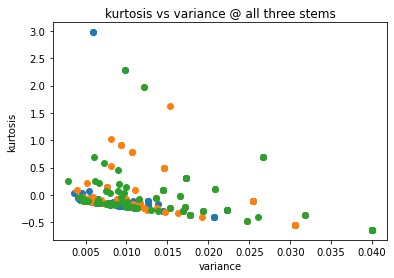

In [28]:
plt.scatter(df_beta.C_var,df_beta.C_kurt)
plt.scatter(df_beta.A_var,df_beta.A_kurt)
plt.scatter(df_beta.B_var,df_beta.B_kurt)


plt.title('kurtosis vs variance @ all three stems')
plt.xlabel('variance')
plt.ylabel('kurtosis')

Text(0, 0.5, 'largest variance')

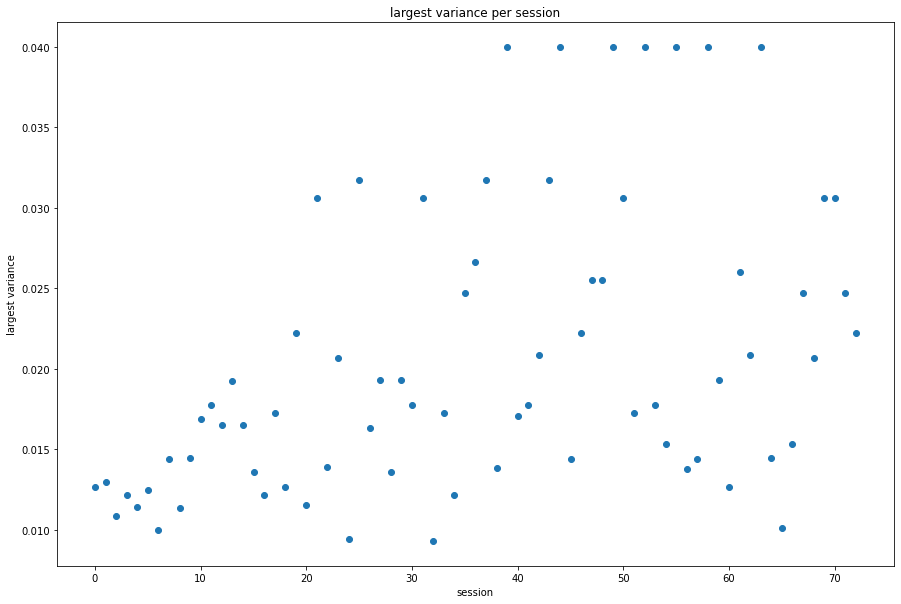

In [29]:
largest_var=[]
for ix in range(len(df_beta)):
    largest_var.append(max(df_beta.iloc[ix]['A_var'],df_beta.iloc[ix]['B_var'],df_beta.iloc[ix]['C_var']))#==[df_beta.iloc[ix]['C_kurt']]
#session_min = (df_beta.A_kurt,df_beta.B_kurt,df_beta.C_kurt).min()
plt.figure(figsize = (15,10))
plt.scatter(range(len(largest_var)),largest_var)
plt.title('largest variance per session')
plt.xlabel('session')
plt.ylabel('largest variance')

Text(0.5, 1.0, 'largest variance vs smallest kurtosis-not necessarilly the same stem?')

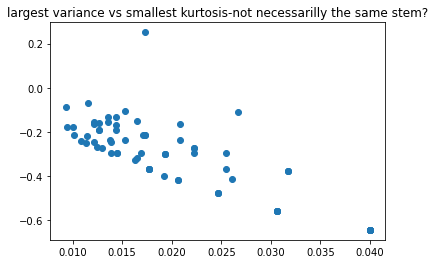

In [30]:
#not the most accurate way to do this, not necessarilly at the same stem
plt.scatter(largest_var,smallest_kurt)
plt.title('largest variance vs smallest kurtosis-not necessarilly the same stem?')

In [31]:
random_session = df[df['sess_chng']==20]
random_session = random_session[random_session['cont_num']==1]
random_session

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,day_chng,stem_switch,bout_num,glob_nom_avg,sess_chng,rew_count,ChooseA,ChooseB,ChooseC
3393,3393,1,A,1,508020202080,20201031,5,0,4,1.0,False,True,292,45.0,20,1,1.0,0.0,0.0
3394,3394,2,A,1,508020202080,20201031,5,1,4,1.0,False,False,292,45.0,20,2,1.0,0.0,0.0
3395,3395,1,A,0,508020202080,20201031,5,2,4,1.0,False,False,292,45.0,20,2,1.0,0.0,0.0
3396,3396,2,A,1,508020202080,20201031,5,3,4,1.0,False,False,292,45.0,20,3,1.0,0.0,0.0
3397,3397,5,C,0,508020202080,20201031,5,4,4,1.0,False,True,293,45.0,20,0,0.0,0.0,1.0
3398,3398,6,C,1,508020202080,20201031,5,5,4,1.0,False,False,293,45.0,20,1,0.0,0.0,1.0
3399,3399,5,C,0,508020202080,20201031,5,6,4,1.0,False,False,293,45.0,20,1,0.0,0.0,1.0
3400,3400,6,C,1,508020202080,20201031,5,7,4,1.0,False,False,293,45.0,20,2,0.0,0.0,1.0
3401,3401,5,C,1,508020202080,20201031,5,8,4,1.0,False,False,293,45.0,20,3,0.0,0.0,1.0
3402,3402,6,C,1,508020202080,20201031,5,9,4,1.0,False,False,293,45.0,20,4,0.0,0.0,1.0


In [ ]:
#plots how many trials he has at each stem 

for session in range(1,(df['sess_chng']).max()):
    random_session = df[df['sess_chng']==session]
    random_session = random_session[random_session['cont_num']==1]
    cont_nom=random_session.contingency.iloc[0]
#         cont_nom=random_session.contingency.iloc[0]
    day_nom=random_session.day.iloc[0]
    sesh_nom=random_session.session.iloc[0]
    plt.figure()
    plt.title(f'day {day_nom},sesh {sesh_nom}, contingency {cont_nom}')
    A_lst=[]
    B_lst=[]
    C_lst=[]

    for ix in range(len(random_session)):
    #     ix=1
        trial = random_session.iloc[ix]['stem']
        reward = random_session.iloc[ix]['reward']
        if trial == 'A':
            A_lst.append(reward)
        if trial =='B':
            B_lst.append(reward)
        if trial =='C':
            C_lst.append(reward)
        A_s = sum(A_lst)+1
        B_s = sum(B_lst)+1
        C_s = sum(C_lst)+1
        A_f = (len(A_lst)-A_s)+1
        B_f = (len(B_lst)-B_s)+1
        C_f = (len(C_lst)-C_s)+1
        y1 = beta(A_s, A_f)
        y2 = beta(B_s, B_f)
        y3 = beta(C_s, C_f)
        #want to change this so it only plots new line if values is different than last trial. 
        if trial =="A":
            plt.plot(x, y1.pdf(x), linewidth=3, color='firebrick',alpha=ix/60)
        if trial=='B':
            plt.plot(x, y2.pdf(x), linewidth=3, color='black',alpha=ix/60)
        if trial=='C':
            plt.plot(x, y3.pdf(x), linewidth=3, color='purple',alpha=ix/60)
        red_patch = mpatches.Patch(color='firebrick', label='A')
        black_patch= mpatches.Patch(color='black', label='B')
        purple_patch= mpatches.Patch(color='purple', label='C')

        plt.legend(handles=[red_patch, black_patch, purple_patch])
        plt.annotate(f'{random_session.ChooseA.sum()}  {random_session.ChooseB.sum()}  {random_session.ChooseC.sum()}',xy=(1,2))
#what i notice from this plot- 
#maybe at the beginning of the day, hes worse at separating the distributions. He spends equal a
#amoutns of time at all three stems more often on the first few sessions than the last few. 
#ex d2s1, spent lots of trials trying to distinguish the 2 bad ones. 
#eg d5 s1... can the blame go on the rat or on the task? is the the rats bheavior that not allowing him to distinguish them, or 
# is the distribution itself causing his behavior to change? 
#hard to tell, though, bc also depends on distribution/easiness 
#spend less time at the worst one throughout the day and expt 
#maybe better explanation is number of rewards in a row
#also does he just stay somewhere if its greater than some value? (.5?) 

In [ ]:
#This will plot only certain global averages at a time. 


#now I want to limit my data to only looking at the same global rew distributions. How does his stat change daily/throughout expt? 

glob_45 = df[df.glob_nom_avg==50]
glob_45 = glob_45[glob_45.cont_num==1]
glob_45['sess_chng1'] = glob_45['session'].ne(glob_45['session'].shift()).cumsum()
glob_45

for session in range(1,(glob_45['sess_chng1']).max()):
    random_session = glob_45[glob_45['sess_chng1']==session]
    random_session = random_session[random_session['cont_num']==1]
    cont_nom=random_session.contingency.iloc[0]
#         cont_nom=random_session.contingency.iloc[0]
    day_nom=random_session.day.iloc[0]
    sesh_nom=random_session.session.iloc[0]
    plt.figure()
    plt.title(f'day {day_nom},sesh {sesh_nom}, contingency {cont_nom}')
    A_lst=[]
    B_lst=[]
    C_lst=[]

    for ix in range(len(random_session)):
    #     ix=1
        trial = random_session.iloc[ix]['stem']
        reward = random_session.iloc[ix]['reward']
        if trial == 'A':
            A_lst.append(reward)
        if trial =='B':
            B_lst.append(reward)
        if trial =='C':
            C_lst.append(reward)
        A_s = sum(A_lst)+1
        B_s = sum(B_lst)+1
        C_s = sum(C_lst)+1
        A_f = (len(A_lst)-A_s)+1
        B_f = (len(B_lst)-B_s)+1
        C_f = (len(C_lst)-C_s)+1
        y1 = beta(A_s, A_f)
        y2 = beta(B_s, B_f)
        y3 = beta(C_s, C_f)
        #want to change this so it only plots new line if values is different than last trial. 
        if trial =="A":
            plt.plot(x, y1.pdf(x), linewidth=3, color='firebrick',alpha=ix/60)
        if trial=='B':
            plt.plot(x, y2.pdf(x), linewidth=3, color='black',alpha=ix/60)
        if trial=='C':
            plt.plot(x, y3.pdf(x), linewidth=3, color='purple',alpha=ix/60)
        red_patch = mpatches.Patch(color='firebrick', label='A')
        black_patch= mpatches.Patch(color='black', label='B')
        purple_patch= mpatches.Patch(color='purple', label='C')

        plt.legend(handles=[red_patch, black_patch, purple_patch])
        plt.annotate(f'{random_session.ChooseA.sum()}  {random_session.ChooseB.sum()}  {random_session.ChooseC.sum()}',xy=(1,2))
# #what i notice from this plot- 
#maybe at the beginning of the day, hes worse at separating the distributions. He spends equal a
#amoutns of time at all three stems more often on the first few sessions than the last few. 
#ex d2s1, spent lots of trials trying to distinguish the 2 bad ones. 
#eg d5 s1... can the blame go on the rat or on the task? is the the rats bheavior that not allowing him to distinguish them, or 
# is the distribution itself causing his behavior to change? 
#hard to tell, though, bc also depends on distribution/easiness 
#spend less time at the worst one throughout the day and expt 
#maybe better explanation is number of rewards in a row
#also does he just stay somewhere if its greater than some value? (.5?) 

In [34]:
glob_45

NameError: name 'glob_45' is not defined

In [ ]:
random_session = glob_45[glob_45['sess_chng1']==session]
random_session

In [ ]:
#interesting that I havent really looked... how many trials he spends at worst stem. Maybe his exploration is just to rule out the worst.. stop going there. 
#and maybe thats harder to distinguish on some of the contignencies. 
#on every trial, which stem distribution has the highest/medium/lowest mean, can maybe add that back into df? 


random_session
mean, var, skew, kurt = beta.stats(C_s, C_f, moments='mvsk')

In [ ]:
int(random_session.ChooseA)

In [ ]:
for session in range(1,(df['sess_chng']).max()):
    random_session = df[df['sess_chng']==session]
    random_session = random_session[random_session['cont_num']==1]
    random_session=random_session[0:30]
    cont_nom=random_session.contingency.iloc[0]
#         cont_nom=random_session.contingency.iloc[0]
    day_nom=random_session.day.iloc[0]
    sesh_nom=random_session.session.iloc[0]
    plt.figure()
    plt.title(f'day {day_nom},sesh {sesh_nom}, contingency {cont_nom}')
    A_lst=[]
    B_lst=[]
    C_lst=[]

    for ix in range(len(random_session)):
    #     ix=1
        trial = random_session.iloc[ix]['stem']
        reward = random_session.iloc[ix]['reward']
        if trial == 'A':
            A_lst.append(reward)
        if trial =='B':
            B_lst.append(reward)
        if trial =='C':
            C_lst.append(reward)
        A_s = sum(A_lst)+1
        B_s = sum(B_lst)+1
        C_s = sum(C_lst)+1
        A_f = (len(A_lst)-A_s)+1
        B_f = (len(B_lst)-B_s)+1
        C_f = (len(C_lst)-C_s)+1
        y1 = beta(A_s, A_f)
        y2 = beta(B_s, B_f)
        y3 = beta(C_s, C_f)
        #want to change this so it only plots new line if values is different than last trial. 
        if trial =='A':
            plt.plot(x, y1.pdf(x), linewidth=3, color='firebrick',alpha=ix/30)
        if trial=='B':
            plt.plot(x, y2.pdf(x), linewidth=3, color='black',alpha=ix/30)
        if trial=='C':
            plt.plot(x, y3.pdf(x), linewidth=3, color='purple',alpha=ix/30)
        red_patch = mpatches.Patch(color='firebrick', label='A')
        black_patch= mpatches.Patch(color='black', label='B')
        purple_patch= mpatches.Patch(color='purple', label='C')

        plt.legend(handles=[red_patch, black_patch, purple_patch])
        plt.annotate(f'{random_session.ChooseA.sum()}  {random_session.ChooseB.sum()}  {random_session.ChooseC.sum()}',xy=(1,2))
#what i notice from this plot- 

#maybe change in rats strategy helps him to separate these distributions earlier
#so that he can stop spending time at worst and have a better idea of which is better
#should use mean and variance, maybe some statistical test about which is actually the best, and see if 
#rat spends more time in the second half at the stem that was best from first half? 

In [ ]:
random_session

In [ ]:
random_session

In [ ]:
df.ChooseA.sum()

In [ ]:
df.ChooseB.sum()

In [ ]:
df.ChooseC.sum()

In [ ]:
#i like the idea of using the beta distribution mean as the rats knowledge of the best stem. 
#would be interesting to look at the probability at the stem right before the rat leaves in the depletion version. 

In [ ]:
df

In [ ]:
# df[(df.sess_chng == 1) & (df.cont_num==1)]
# df.loc[0,'ChooseA']['reward','']

In [ ]:
#when is the first "exploit" bout, and what are the distributions of the stems before then? 

In [13]:
#for session in range(1,(df['sess_chng']).max()):
random_session = df[df['sess_chng']==20]

random_session = random_session[random_session['cont_num']==1]
bout = random_session[random_session.stem_switch==1]


bout_lens = []
for ix in range(len(bout)+1):
    if ix < len(bout):
        bout_lens.append( bout['trial'].iloc[ix] -bout['trial'].iloc[ix-1])
    elif ix == len(bout):
        bout_lens.append( 60 -bout['trial'].iloc[ix-1])
bout_lens.pop(0)

long_bout=[]
for ix in range(len(bout_lens)):
    long_bout.append((bout_lens[ix]>10))
    

res = [i for i, val in enumerate(long_bout) if val]


before_exploit = bout.iloc[0:res[0]]

bout = random_session[random_session.stem_switch==1]
bout
rew_sum=[]
for ix in range(len(bout)+1):
    if ix < len(bout):
        bout1 = random_session.loc[bout.index[ix-1]:bout.index[ix]-1]
        rew_sum.append(bout1.reward.sum())
rew_sum.pop(0)

#want to make a new df(?) that has stem, length of bout, and how many rewards. 
#later will combine same stems. 
meta_data = pd.DataFrame(before_exploit.stem)
meta_data['bout_len'] = bout_lens[0:res[0]]
meta_data['rew_num'] = rew_sum
exploits_first = bout.iloc[res[0]].stem
cont= random_session.iloc[0]['contingency']
meta_data['conting'] = cont
# random_session=random_session[0:30]
# cont_nom=random_session.contingency.iloc[0]
# #         cont_nom=random_session.contingency.iloc[0]
# day_nom=random_session.day.iloc[0]
# sesh_nom=random_session.session.iloc[0]

#     first_stem=bout['stem'].iloc[0]
#     if len(bout)>1:
#         second_stem=bout['stem'].iloc[1]
#     else: 
#         second_stem = first_stem
#     if len(bout)>2:
#         third_stem = bout['stem'].iloc[2]
#     else: 
#         third_stem = second_stem
#     if len(bout) > 3:
#         fourth_stem = bout['stem'].iloc[3]
#         fourth_bout_num = random_session.bout_num.min()+3
#         fourth_bout_len = len(random_session.loc[random_session.bout_num==fourth_bout_num])
#     else:
#         fourth_stem=third_stem
#     first_bout_num = random_session.bout_num.min()
#     first_bout = random_session.loc[random_session.bout_num==first_bout_num]
#     second_bout_num = random_session.bout_num.min()+1
#     second_bout = random_session.loc[random_session.bout_num==second_bout_num]
#     third_bout_num = random_session.bout_num.min()+2
#     third_bout = random_session.loc[random_session.bout_num==third_bout_num]
#     first_bout_beta_data_s = first_bout['reward'].sum()
#     first_bout_beta_data_f = len(first_bout)-first_bout_beta_data_s
#     second_bout_beta_data_s = second_bout['reward'].sum()
#     second_bout_beta_data_f = len(second_bout)-second_bout_beta_data_s
#     third_bout_beta_data_s = third_bout['reward'].sum()
#     third_bout_beta_data_f = len(third_bout)-third_bout_beta_data_s
#     x = np.linspace(0, 1, 10000)
#     y1 = beta(first_bout_beta_data_s+1, first_bout_beta_data_f+1)
#     y2 = beta(second_bout_beta_data_s+1, second_bout_beta_data_f+1)
#     y3 = beta(third_bout_beta_data_s+1, third_bout_beta_data_f+1)
#     #     ax.set_title(f"PDF of Beta; #success={a-1},#failures={b-1} (red)", fontsize=20)
#     #     ax.set_xlabel("X", fontsize=16)
#     #     ax.set_ylabel("Probability Density", fontsize=16)
#     plt.figure()
#     plt.plot(x, y1.pdf(x), linewidth=3, color='firebrick')
#     plt.plot(x, y2.pdf(x), linewidth=3, color='black')
#     plt.plot(x, y3.pdf(x), linewidth=3, color='purple',alpha=.5)
#     plt.xlabel('x')
#     plt.ylabel('probability distribution')
#     plt.title(f'beta dist for first three stems visited--{cont_nom}')
#     plt.legend([first_stem,second_stem,third_stem,fourth_stem])
#     #plt.annotate(f'stem4={fourth_stem}-{fourth_bout_len}',xy=(.7,2))


In [14]:
meta_data
#     elif ix == len(bout):
#         bout1 = random_session.loc[bout.index[ix]:bout.tail[0]]
#         rew_sum.append(bout1.reward.sum())

,stem,bout_len,rew_num,conting
3393,A,4,3,508020202080
3397,C,7,5,508020202080
3404,B,7,2,508020202080
3411,C,4,2,508020202080


In [38]:
bout.iloc[res[0]].stem

'A'

In [16]:
if len(meta_data[meta_data.stem=='C']) >1:
    combined_bout_len_c = (meta_data[meta_data.stem=='C']).bout_len.sum()
    combined_rew_c = (meta_data[meta_data.stem=='C']).rew_num.sum()
elif len(meta_data[meta_data.stem=='C']) ==1:
    combined_bout_len_c = (meta_data[meta_data.stem=='C']).bout_len.sum()
    combined_rew_c = (meta_data[meta_data.stem=='C']).rew_num.sum()
if len(meta_data[meta_data.stem=='A']) >1:
    combined_bout_len_a = (meta_data[meta_data.stem=='A']).bout_len.sum()
    combined_rew_a = (meta_data[meta_data.stem=='A']).rew_num.sum()
elif len(meta_data[meta_data.stem=='A']) ==1:
    combined_bout_len_a = (meta_data[meta_data.stem=='A']).bout_len.sum()
    combined_rew_a = (meta_data[meta_data.stem=='A']).rew_num.sum()
if len(meta_data[meta_data.stem=='B']) >1:
    combined_bout_len_b = (meta_data[meta_data.stem=='B']).bout_len.sum()
    combined_rew_b = (meta_data[meta_data.stem=='B']).rew_num.sum()
elif len(meta_data[meta_data.stem=='B']) ==1:
    combined_bout_len_b = (meta_data[meta_data.stem=='B']).bout_len.sum()
    combined_rew_b = (meta_data[meta_data.stem=='B']).rew_num.sum()
stem = ['A','B','C']
bout_len = [combined_bout_len_a,combined_bout_len_b,combined_bout_len_c]
rew = [combined_rew_a,combined_rew_b,combined_rew_c]
combined_meta_data= pd.DataFrame()
combined_meta_data['stem'] = pd.DataFrame(stem)
combined_meta_data['rew']= rew
combined_meta_data['bout_len']=bout_len


ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [ ]:
# combined_meta_data.iloc[3]
stem
# combined_meta_data['stem'] = pd.DataFrame(stem)
combined_rew_a


In [ ]:
for ix in range(len(combined_meta_data)):
    n_s = combined_meta_data.iloc[ix]['rew']
    n_f = combined_meta_data.iloc[ix]['bout_len']-n_s
    x = np.linspace(0, 1, 10000)
    y1 = beta(n_s+1, n_f+1)
    plt.plot(x, y1.pdf(x),alpha=.5)
    plt.legend(['A','B','C'])
    plt.annotate(f'{exploits_first},{cont}', xy=(0,2))

In [17]:
#this will calc which is the first stem that rat exploit (bout_len >15) and what were the distributions of 
#all stems before this bout? 

for session in range(0,(df['sess_chng']).max()):
    random_session = df[df['sess_chng']==session]

    random_session = random_session[random_session['cont_num']==1]
    bout = random_session[random_session.stem_switch==1]


    bout_lens = []
    for ix in range(len(bout)+1):
        if ix < len(bout):
            bout_lens.append( bout['trial'].iloc[ix] -bout['trial'].iloc[ix-1])
        elif ix == len(bout):
            bout_lens.append( 60 -bout['trial'].iloc[ix-1])
    bout_lens.pop(0)

    long_bout=[]
    for ix in range(len(bout_lens)):
        long_bout.append((bout_lens[ix]>10))


    res = [i for i, val in enumerate(long_bout) if val]

    if res:
        before_exploit = bout.iloc[0:res[0]]

        rew_sum=[]
        for ix in range(len(bout)+1):
            if ix < len(bout):
                bout1 = random_session.loc[bout.index[ix-1]:bout.index[ix]-1]
                rew_sum.append(bout1.reward.sum())
        rew_sum.pop(0)

#         #want to make a new df(?) that has stem, length of bout, and how many rewards. 
#         #later will combine same stems. 
        meta_data = pd.DataFrame(before_exploit.stem)
        meta_data['bout_len'] = bout_lens[0:res[0]]
        meta_data['rew_num'] = rew_sum[0:res[0]]
        exploits_first = bout.iloc[res[0]].stem
        cont= random_session.iloc[0]['contingency']
        meta_data['conting'] = cont
        if len(meta_data[meta_data.stem=='C']) >1:
            combined_bout_len_c = (meta_data[meta_data.stem=='C']).bout_len.sum()
            combined_rew_c = (meta_data[meta_data.stem=='C']).rew_num.sum()
        elif len(meta_data[meta_data.stem=='C']) ==1:
            combined_bout_len_c = (meta_data[meta_data.stem=='C']).bout_len.sum()
            combined_rew_c = (meta_data[meta_data.stem=='C']).rew_num.sum()
        if len(meta_data[meta_data.stem=='A']) >1:
            combined_bout_len_a = (meta_data[meta_data.stem=='A']).bout_len.sum()
            combined_rew_a = (meta_data[meta_data.stem=='A']).rew_num.sum()
        elif len(meta_data[meta_data.stem=='A']) ==1:
            combined_bout_len_a = (meta_data[meta_data.stem=='A']).bout_len.sum()
            combined_rew_a = (meta_data[meta_data.stem=='A']).rew_num.sum()
        if len(meta_data[meta_data.stem=='B']) >1:
            combined_bout_len_b = (meta_data[meta_data.stem=='B']).bout_len.sum()
            combined_rew_b = (meta_data[meta_data.stem=='B']).rew_num.sum()
        elif len(meta_data[meta_data.stem=='B']) ==1:
            combined_bout_len_b = (meta_data[meta_data.stem=='B']).bout_len.sum()
            combined_rew_b = (meta_data[meta_data.stem=='B']).rew_num.sum()
        stem = ["A",'B','C']
        bout_len = [combined_bout_len_a,combined_bout_len_b,combined_bout_len_c]
        rew = [combined_rew_a,combined_rew_b,combined_rew_c]
        combined_meta_data=pd.DataFrame(stem)
        combined_meta_data['stem'] = pd.DataFrame(stem)
        combined_meta_data['rew']= rew
        combined_meta_data['bout_len']=bout_len
        plt.figure()
#         for ix in range(len(combined_meta_data)):
#             n_s = combined_meta_data.iloc[ix]['rew']
#             n_f = combined_meta_data.iloc[ix]['bout_len']-n_s
#             x = np.linspace(0, 1, 10000)
#             y1 = beta(n_s+1, n_f+1)
#             plt.plot(x, y1.pdf(x),alpha=.5)
#             plt.legend(['A','B','C'])
#             plt.annotate(f'{exploits_first},{cont}', xy=(.8,2))

IndexError: single positional indexer is out-of-bounds

In [ ]:
random_session = df[df['sess_chng']==23]
random_session = random_session[random_session['cont_num']==1]


In [ ]:
res

In [ ]:
combined_meta_data

In [ ]:
random_session

In [ ]:
bout